
<div style="border:1px solid black; padding:20px 20px;text-align: justify;text-justify: inter-word">
    <strong>Project - Motor Control 
    

<br/>


In [1]:
!pip install --upgrade tdmclient


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install tqdm scipy


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install numpy matplotlib pandas scipy tqdm


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<strong>Imports :

In [4]:
import os
import sys
import math
from statistics import mean
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [190]:
import tdmclient.notebook
await tdmclient.notebook.start()

In [442]:
await tdmclient.notebook.stop()

      File "C:\Users\prona\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\iostream.py", line 267, in schedule
    self.run()
  File "C:\Users\prona\AppData\Local\Programs\Python\Python311\Lib\threading.py", line 1401, in run
    self._bootstrap_inner()
  File "C:\Users\prona\AppData\Local\Programs\Python\Python311\Lib\threading.py", line 1047, in _bootstrap_inner
    self.function(*self.args, **self.kwargs)
  File "C:\Users\prona\AppData\Local\Temp\ipykernel_45080\4043924853.py", line 16, in _run
    local_print("Exception in threading.excepthook:",
  File "C:\Users\prona\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\iostream.py", line 575, in flush
    self._event_pipe.send(b"")
    ^^^^^^^^^^^^^^^^
  File "C:\Users\prona\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\iostream.py", line 145, in _event_pipe
    self.function(*self.args, **self.kwargs)
  File "C:\Users\prona\AppData\Local\Temp\ipykernel_45080\4043924853.py"

NameError: name 'tdmclient' is not defined

Exception in thread Exception in threading.excepthook:
Exception ignored in thread started by: <bound method Thread._bootstrap of <Timer(Thread-583238, started 14876)>>
Traceback (most recent call last):
  File "C:\Users\prona\AppData\Local\Programs\Python\Python311\Lib\threading.py", line 1002, in _bootstrap
Exception in thread Thread-583239:
Traceback (most recent call last):
  File "C:\Users\prona\AppData\Local\Programs\Python\Python311\Lib\threading.py", line 1045, in _bootstrap_inner
Exception in thread Thread-583237:
Traceback (most recent call last):
  File "C:\Users\prona\AppData\Local\Programs\Python\Python311\Lib\threading.py", line 1045, in _bootstrap_inner
Exception in thread Thread-583236:
Traceback (most recent call last):
  File "C:\Users\prona\AppData\Local\Programs\Python\Python311\Lib\threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "C:\Users\prona\AppData\Local\Programs\Python\Python311\Lib\threading.py", line 1401, in run
    self.run()
  File "C:

<strong>Calibration

Calibration when turning : 

In [191]:
%%run_python

counting = 0
time = 0

timer_period[0] = 10 # milliseconds

@onevent 
def button_right(): # start counting
    global counting, time, motor_left_target, motor_right_target
    counting = 1
    time = 0
    motor_left_target = 100
    motor_right_target = -100

@onevent 
def button_left(): # start counting
    global counting, time, motor_left_target, motor_right_target
    counting = 1
    time = 0
    motor_left_target = -100
    motor_right_target = 100

@onevent 
def button_center(): # stop counting
    global counting, motor_left_target, motor_right_target
    counting = 0
    motor_left_target = 0
    motor_right_target = 0

@onevent 
def timer0():
    global counting, time
    if counting == 1:
        time = time + 1

In [172]:
print(time)
print(time/100,'seconds pour 20 tours vers la droite')
print('Time for 1 turn (360°) : ', time/2000) 

#1 tic toute les 10ms
#1s -> 100 tics tout les 1000ms

16943
169.43 seconds pour 20 tours
Time for 1 turn (360°) :  8.4715


In [30]:
print(time)
print(time/100,'seconds pour 10 tours vers la droite')
print('temps pour un tour : ', time/1000) 


8599
85.99 seconds pour 10 tours
temps pour un tour :  8.599


In [193]:
print(time)
print(time/100,'seconds pour 20 tours vers la gauche')
print('Time for 1 turn (360°) : ', time/1000) 

#1 tic toute les 10ms
#1s -> 100 tics tout les 1000ms

8937
89.37 seconds pour 20 tours vers la gauche
Time for 1 turn (360°) :  8.937


Calibration in straight line

In [38]:
%%run_python

counting = 0
time = 0

timer_period[0] = 10 # milliseconds

@onevent 
def button_forward(): # start counting
    global counting, time, motor_left_target, motor_right_target
    counting = 1
    time = 0
    motor_left_target = 99
    motor_right_target = 100

@onevent 
def button_center(): # stop counting
    global counting, motor_left_target, motor_right_target
    counting = 0
    motor_left_target = 0
    motor_right_target = 0

@onevent 
def timer0():
    global counting, time
    if counting == 1:
        time = time + 1

In [213]:
#121cm pour 35.37s at speed 100

print(time)
print(time/100,'seconds for 121cm')
print('temps pour un tour : ', time/1000) 
print(35.37/121)

3811
38.11 seconds for 121cm
temps pour un tour :  3.811
0.2923140495867768


In [214]:
#130cm pour 38.11s at speed 100

print(time)
print(time/100,'seconds for 121cm')
print('temps pour un tour : ', time/1000) 
print(38.11/130)

3811
38.11 seconds for 121cm
temps pour un tour :  3.811
0.29315384615384615


Good speed :

In [41]:
print(time)
print(time/100,'seconds for 141cm')
print('temps pour un tour : ', time/1000) 
print(41.71/141)

<module 'time' (built-in)>


TypeError: unsupported operand type(s) for /: 'module' and 'int'

In [216]:
resolution = [1,1] #1 point for 1cm (see with vision)
speed = 3537/121
print(speed)
print(3811/130)

29.231404958677686
29.315384615384616


Calculation of the angle and the distance to travl from two points

In [16]:
@onevent
def angle_to_rotate(pos_i, pos_f, theta_i):
    a = pos_f-pos_i
    theta_f = np.arctan2(a[1], a[0])
    r_theta = (theta_f*180)/np.pi-theta_i
    return r_theta
    
pos_thymio = np.array([1,1])
pos_goal = np.array([30,45])
theta = angle_to_rotate(pos_thymio,pos_goal,0)
print(theta)

56.61148642388849


In [17]:
@onevent
def distance_to_cover(pos_i, pos_f):
    distance = np.linalg.norm(pos_f-pos_i)
    return distance

pos_thymio = np.array([0,0])
pos_goal = np.array([30,45])
theta = angle_to_rotate(pos_thymio,pos_goal,0)
dist = distance_to_cover(pos_thymio,pos_goal)
print(dist)

54.08326913195984


In [22]:
nb_node = 3
initial_orientation = 0 #degree
positions = np.array([[0,0],[30,45],[50,50],[17,15],[50,10]]);
rotations = np.zeros(positions.shape[0]-1)
distances =  np.zeros(positions.shape[0]-1)

rotations[0] = angle_to_rotate(positions[0],positions[1],initial_orientation)
orientation = initial_orientation+rotations[0]

for i in range(1,positions.shape[0]-1):
    rotations[i] = angle_to_rotate(positions[i],positions[i+1],orientation)
    distances[i-1] = distance_to_cover(positions[i-1],positions[i])
    orientation = orientation+rotations[i]

distances[distances.size-1]=distance_to_cover(positions[distances.size-1],positions[distances.size])

print('Rotations :',rotations)
print('Distances :',distances)

Rotations : [  56.30993247  -42.27368901 -147.35155915  124.6996675 ]
Distances : [54.08326913 20.61552813 48.10405388 33.37663854]


In [219]:
print(3537/121)

29.231404958677686


In [22]:
rotation_ratio = 360/rotations

print(rotation_ratio)

[ 6.39318827 -8.51593529 -2.44313669  2.88693633]


In [45]:
%%run_python

FORWARD = 1
TURN = 2
BACKWARD = 3
STOP = 4
ONETURN = 8599
SPEED = 296 #2930//10
SAMPLING = 5
map_resolution = 1
pos_thymio = [1,1]
pos_goal = [30,45]

theta_input = 20
dist_input = 10

rotations = [56, -42, -147, 125]
distances = [54, 21, 48, 33]
rotation_ratios = [6,-8,-2,3]


#theta = angle_to_rotate(pos_thymio,pos_goal,0)

state = 0
time = 0
iter = 0

timer_period[0] = SAMPLING # 5 ms resolution

#Start
@onevent 
def button_forward():
    global state, FORWARD, time, motor_left_target, motor_right_target
    state = TURN
    time = 0
    if rotation_ratios[0]>=0:
        motor_left_target = 100
        motor_right_target = -100
    if rotation_ratios[0]<0:
        motor_left_target = -100
        motor_right_target = 100

#Stop 
@onevent
def button_center():
    global state, time, motor_left_target, motor_right_target
    state = 0
    time = 0
    motor_left_target = 0
    motor_right_target = 0

#Loop
@onevent 
def timer0():
    global state, FORWARD, TURN, ONETURN, SAMPLING, time, motor_left_target, motor_right_target, theta_input, rotation_ratios, distances, iter
    time = time + 1
    
    if state == FORWARD:
        nf_leds_top(32,0,0)
        dist = distances[iter]
        if time > SPEED//SAMPLING*dist:
            
            if iter==(len(distances)-1):
                state = STOP
                motor_left_target = 0
                motor_right_target = 0
                
            else:
                iter = iter+1
                time = 0
                state = TURN
                if rotation_ratios[iter]>=0:
                    motor_left_target = 100
                    motor_right_target = -100
                if rotation_ratios[iter]<0:
                    motor_left_target = -100
                    motor_right_target = 100
                if iter==len(distances):
                    state = STOP
            
    if state == TURN:
        nf_leds_top(32,0,0)
        turn_ratio = rotation_ratios[iter]
        if turn_ratio<0:
            turn_ratio = -turn_ratio
        if time > ONETURN//SAMPLING//turn_ratio: #90/360
            time = 0
            state = FORWARD
            motor_left_target = 99
            motor_right_target = 100

    if state == STOP:
        motor_left_target = 0
        motor_right_target = 0
        nf_leds_top(0,32,0)


## Async implementation:

In [198]:
from tdmclient import ClientAsync, aw
client = ClientAsync()
node = await client.wait_for_node()
await node.lock()

Node 0102d6c0-0c6c-479f-8406-474092b0daba

In [ ]:
await node.wait_for_variables()
node.var

In [6]:
def angle_to_rotate(pos_i, pos_f, theta_i):
    a = pos_f-pos_i
    theta_f = np.arctan2(a[1], a[0])
    r_theta = (theta_f*180)/np.pi-theta_i
    return r_theta

def distance_to_cover(pos_i, pos_f):
    distance = np.linalg.norm(pos_f-pos_i)
    return distance

In [7]:
def path(positions, initial_orientation):
    nb_node = 3
    rotations = np.zeros(positions.shape[0]-1)
    distances =  np.zeros(positions.shape[0]-1)
    
    rotations[0] = angle_to_rotate(positions[0],positions[1],initial_orientation)
    orientation = initial_orientation+rotations[0]
    
    for i in range(1,positions.shape[0]-1):
        rotations[i] = angle_to_rotate(positions[i],positions[i+1],orientation)
        distances[i-1] = distance_to_cover(positions[i-1],positions[i])
        orientation = orientation+rotations[i]

    distances[distances.size-1]=distance_to_cover(positions[distances.size-1],positions[distances.size])
    rotation_ratios = rotations/360
    return distances, rotations, orientation, rotation_ratios


In [262]:
import asyncio
import time
    
async def drive_for_seconds(client, seconds):
    # Set the motor speeds
    v = {
        "motor.left.target": [int(99)],
        "motor.right.target": [int(100)],
    }
    await node.set_variables(v)
    await asyncio.sleep(seconds)
    #vstop = {
    #    "motor.left.target": [int(0)],
    #    "motor.right.target": [int(0)],
    #}
    #await node.set_variables(vstop)

async def turn_for_seconds(client, seconds):
    # Set the motor speeds
    if seconds != 0:
        if seconds>0:
            v = {
                "motor.left.target": [int(100)],
                "motor.right.target": [int(-100)],
            }
        else:
            v = {
                "motor.left.target": [int(-100)],
                "motor.right.target": [int(100)],
            }
        await node.set_variables(v)
        await asyncio.sleep(abs(seconds))
        #vstop = {
        #    "motor.left.target": [int(0)],
        #    "motor.right.target": [int(0)],
        #}
        #await node.set_variables(vstop)



In [211]:
async def print_elapsed_time(seconds, interval=0.5):
    start_time = time.monotonic()
    while True:
        elapsed = time.monotonic() - start_time
        if elapsed > seconds:
            break
        print(f"Elapsed time: {elapsed:.4f} seconds")
        await asyncio.sleep(interval)

In [212]:
async def print_steps(step,interval=0.5):
    start_time = time.monotonic()
    elapsed = time.monotonic() - start_time
    print(f"Step {step} reached in {elapsed:.4f} seconds")
    await asyncio.sleep(interval)

Driving calculation : 

In [223]:
#@tdmclient.notebook.sync_var
async def drive(distances, rotations, orientation):
    
    rotations = rotations/360
    ONETURN_RIGHT = 8.47 #s/turn #8.599
    ONETURN_LEFT = 8.94 #s/turn
    SPEED = 1/0.2958 #s/cm #2958//10

    rotation_time = np.zeros(rotations.shape[0])
    for i in range(len(rotations)):
        if rotations[i] >= 0:
            rotation_time[i] = rotations[i]*ONETURN_RIGHT
        else:
            rotation_time[i] = rotations[i]*ONETURN_LEFT
    distance_time = distances/SPEED

    print("Time to turn", rotation_time, "Time_straight", distance_time)
    for i in range(0,distance_time.shape[0]):
        turn_task = asyncio.create_task(turn_for_seconds(client, rotation_time[i]))
        await turn_task
        drive_task = asyncio.create_task(drive_for_seconds(client, distance_time[i]))
        await drive_task
        #print_task = asyncio.create_task(print_steps(i+1))
        #await print_task
    

Main:

In [225]:
async def main():    
    global temperature, leds_top
    initial_orientation = 0 #degree
    positions = np.array([[0,0],[30,45]])#[0,0],[30,45],[50,50],[17,15],[50,10]
    
    result = path(positions, initial_orientation)
    distances = result[0]
    rotations = result[1]
    orientation = result[2]

    print("distances =", distances,"rotation =", rotations, "orientation =",orientation)
    await drive(distances, rotations, orientation)

await main()

distances = [54.08326913 20.61552813 48.10405388 33.37663854] rotation = [  56.30993247  -42.27368901 -147.35155915  124.6996675 ] orientation = -8.615648184164115
Time to turn [ 1.32484758 -1.04979661 -3.65923039  2.93390607] Time_straight [15.99783101  6.09807322 14.22917914  9.87280968]


In [ ]:
#drive_task = asyncio.create_task(drive_for_seconds(client, 5))
#print_task = asyncio.create_task(print_elapsed_time(5))

#await drive_task
#await print_task

<strong>Kalman filter : 

In [9]:
from threading import Timer

class RepeatedTimer(object):
    def __init__(self, interval, function, *args, **kwargs):
        self._timer     = None
        self.interval   = interval
        self.function   = function
        self.args       = args
        self.kwargs     = kwargs
        self.is_running = False
        self.start()

    def _run(self):
        self.is_running = False
        self.start()
        self.function(*self.args, **self.kwargs)

    def start(self):
        if not self.is_running:
            self._timer = Timer(self.interval, self._run)
            self._timer.start()
            self.is_running = True

    def stop(self):
        self._timer.cancel()
        self.is_running = False

In [385]:
acquire_data = True
Ts = 0.1
thymio_data = []

def motors(left, right):
    return {
        "motor.left.target": [left],
        "motor.right.target": [right],
    }

def get_data():
    thymio_data.append({"left_speed":node["motor.left.speed"],
                        "right_speed":node["motor.right.speed"]})
    

if acquire_data:
    await node.wait_for_variables() # wait for Thymio variables values
    rt = RepeatedTimer(Ts, get_data) # it auto-starts, no need of rt.start()

# dont need the following for the project :
    try:
        # time.sleep would not work here, use asynchronous client.sleep method instead
        await client.sleep(5)
        node.send_set_variables(motors(99, 100))
        await client.sleep(15) # your long-running job goes here...
        node.send_set_variables(motors(-100, 100))
        await client.sleep(5) # your long-running job goes here...
        node.send_set_variables(motors(100, 100))
        await client.sleep(5) # your long-running job goes here...
    finally:
        rt.stop() # better in a try/finally block to make sure the program ends!
        node.send_set_variables(motors(0, 0))
else:
    thymio_data = [{'ground': [177, 496], 'sensor': [177, 496], 'left_speed': 0, 'right_speed': 65535}, {'ground': [178, 495], 'sensor': [178, 495], 'left_speed': 0, 'right_speed': 65535}, {'ground': [177, 495], 'sensor': [177, 495], 'left_speed': 0, 'right_speed': 65535}, {'ground': [177, 496], 'sensor': [177, 496], 'left_speed': 0, 'right_speed': 65535}, {'ground': [177, 495], 'sensor': [177, 495], 'left_speed': 0, 'right_speed': 65535}, {'ground': [178, 496], 'sensor': [178, 496], 'left_speed': 0, 'right_speed': 65535}, {'ground': [178, 495], 'sensor': [178, 495], 'left_speed': 0, 'right_speed': 65535}, {'ground': [177, 496], 'sensor': [177, 496], 'left_speed': 0, 'right_speed': 65535}, {'ground': [177, 496], 'sensor': [177, 496], 'left_speed': 0, 'right_speed': 65535}, {'ground': [178, 495], 'sensor': [178, 495], 'left_speed': 0, 'right_speed': 65535}, {'ground': [177, 495], 'sensor': [177, 495], 'left_speed': 0, 'right_speed': 65535}, {'ground': [177, 497], 'sensor': [177, 497], 'left_speed': 0, 'right_speed': 65535}, {'ground': [177, 495], 'sensor': [177, 495], 'left_speed': 0, 'right_speed': 65535}, {'ground': [177, 495], 'sensor': [177, 495], 'left_speed': 0, 'right_speed': 65535}, {'ground': [178, 496], 'sensor': [178, 496], 'left_speed': 0, 'right_speed': 65535}, {'ground': [180, 546], 'sensor': [180, 546], 'left_speed': 0, 'right_speed': 65535}, {'ground': [177, 454], 'sensor': [177, 454], 'left_speed': 0, 'right_speed': 65535}, {'ground': [97, 69], 'sensor': [97, 69], 'left_speed': 0, 'right_speed': 65535}, {'ground': [39, 41], 'sensor': [39, 41], 'left_speed': 0, 'right_speed': 0}, {'ground': [82, 47], 'sensor': [82, 47], 'left_speed': 0, 'right_speed': 65535}, {'ground': [34, 29], 'sensor': [34, 29], 'left_speed': 0, 'right_speed': 65535}, {'ground': [24, 9], 'sensor': [24, 9], 'left_speed': 0, 'right_speed': 65535}, {'ground': [899, 447], 'sensor': [899, 447], 'left_speed': 0, 'right_speed': 65535}, {'ground': [967, 631], 'sensor': [967, 631], 'left_speed': 0, 'right_speed': 65535}, {'ground': [972, 682], 'sensor': [972, 682], 'left_speed': 0, 'right_speed': 65535}, {'ground': [971, 675], 'sensor': [971, 675], 'left_speed': 0, 'right_speed': 65535}, {'ground': [970, 651], 'sensor': [970, 651], 'left_speed': 0, 'right_speed': 65535}, {'ground': [971, 642], 'sensor': [971, 642], 'left_speed': 0, 'right_speed': 65535}, {'ground': [970, 628], 'sensor': [970, 628], 'left_speed': 0, 'right_speed': 65535}, {'ground': [970, 628], 'sensor': [970, 628], 'left_speed': 0, 'right_speed': 65535}, {'ground': [970, 628], 'sensor': [970, 628], 'left_speed': 0, 'right_speed': 65535}, {'ground': [970, 627], 'sensor': [970, 627], 'left_speed': 0, 'right_speed': 65535}, {'ground': [970, 611], 'sensor': [970, 611], 'left_speed': 0, 'right_speed': 65535}, {'ground': [971, 604], 'sensor': [971, 604], 'left_speed': 0, 'right_speed': 0}, {'ground': [971, 598], 'sensor': [971, 598], 'left_speed': 0, 'right_speed': 65535}, {'ground': [972, 642], 'sensor': [972, 642], 'left_speed': 0, 'right_speed': 65535}, {'ground': [973, 714], 'sensor': [973, 714], 'left_speed': 0, 'right_speed': 65535}, {'ground': [973, 704], 'sensor': [973, 704], 'left_speed': 0, 'right_speed': 65535}, {'ground': [973, 702], 'sensor': [973, 702], 'left_speed': 0, 'right_speed': 0}, {'ground': [972, 700], 'sensor': [972, 700], 'left_speed': 0, 'right_speed': 65535}, {'ground': [973, 701], 'sensor': [973, 701], 'left_speed': 0, 'right_speed': 0}, {'ground': [974, 707], 'sensor': [974, 707], 'left_speed': 0, 'right_speed': 0}, {'ground': [974, 711], 'sensor': [974, 711], 'left_speed': 0, 'right_speed': 65535}, {'ground': [974, 707], 'sensor': [974, 707], 'left_speed': 0, 'right_speed': 65535}, {'ground': [972, 702], 'sensor': [972, 702], 'left_speed': 0, 'right_speed': 65535}, {'ground': [973, 686], 'sensor': [973, 686], 'left_speed': 0, 'right_speed': 65535}, {'ground': [972, 662], 'sensor': [972, 662], 'left_speed': 0, 'right_speed': 65535}, {'ground': [968, 602], 'sensor': [968, 602], 'left_speed': 0, 'right_speed': 65535}, {'ground': [954, 539], 'sensor': [954, 539], 'left_speed': 0, 'right_speed': 65535}, {'ground': [833, 464], 'sensor': [833, 464], 'left_speed': 0, 'right_speed': 65535}, {'ground': [826, 460], 'sensor': [826, 460], 'left_speed': 2, 'right_speed': 65535}, {'ground': [511, 244], 'sensor': [511, 244], 'left_speed': 39, 'right_speed': 31}, {'ground': [306, 131], 'sensor': [306, 131], 'left_speed': 49, 'right_speed': 35}, {'ground': [194, 87], 'sensor': [194, 87], 'left_speed': 58, 'right_speed': 57}, {'ground': [174, 84], 'sensor': [174, 84], 'left_speed': 64, 'right_speed': 42}, {'ground': [174, 84], 'sensor': [174, 84], 'left_speed': 38, 'right_speed': 32}, {'ground': [174, 84], 'sensor': [174, 84], 'left_speed': 38, 'right_speed': 32}, {'ground': [171, 84], 'sensor': [171, 84], 'left_speed': 58, 'right_speed': 30}, {'ground': [169, 81], 'sensor': [169, 81], 'left_speed': 49, 'right_speed': 56}, {'ground': [167, 80], 'sensor': [167, 80], 'left_speed': 42, 'right_speed': 55}, {'ground': [167, 81], 'sensor': [167, 81], 'left_speed': 46, 'right_speed': 35}, {'ground': [168, 80], 'sensor': [168, 80], 'left_speed': 59, 'right_speed': 57}, {'ground': [172, 81], 'sensor': [172, 81], 'left_speed': 63, 'right_speed': 54}, {'ground': [173, 84], 'sensor': [173, 84], 'left_speed': 45, 'right_speed': 56}, {'ground': [171, 84], 'sensor': [171, 84], 'left_speed': 60, 'right_speed': 55}, {'ground': [171, 84], 'sensor': [171, 84], 'left_speed': 60, 'right_speed': 55}, {'ground': [165, 84], 'sensor': [165, 84], 'left_speed': 54, 'right_speed': 36}, {'ground': [166, 86], 'sensor': [166, 86], 'left_speed': 57, 'right_speed': 43}, {'ground': [166, 86], 'sensor': [166, 86], 'left_speed': 41, 'right_speed': 43}, {'ground': [168, 87], 'sensor': [168, 87], 'left_speed': 59, 'right_speed': 47}, {'ground': [175, 96], 'sensor': [175, 96], 'left_speed': 42, 'right_speed': 48}, {'ground': [280, 157], 'sensor': [280, 157], 'left_speed': 61, 'right_speed': 50}, {'ground': [503, 262], 'sensor': [503, 262], 'left_speed': 60, 'right_speed': 49}, {'ground': [658, 355], 'sensor': [658, 355], 'left_speed': 46, 'right_speed': 36}, {'ground': [639, 345], 'sensor': [639, 345], 'left_speed': 49, 'right_speed': 57}, {'ground': [639, 345], 'sensor': [639, 345], 'left_speed': 49, 'right_speed': 57}, {'ground': [501, 257], 'sensor': [501, 257], 'left_speed': 42, 'right_speed': 51}, {'ground': [187, 88], 'sensor': [187, 88], 'left_speed': 45, 'right_speed': 60}, {'ground': [166, 85], 'sensor': [166, 85], 'left_speed': 53, 'right_speed': 56}, {'ground': [166, 84], 'sensor': [166, 84], 'left_speed': 60, 'right_speed': 55}, {'ground': [168, 84], 'sensor': [168, 84], 'left_speed': 50, 'right_speed': 53}, {'ground': [169, 85], 'sensor': [169, 85], 'left_speed': 57, 'right_speed': 47}, {'ground': [167, 87], 'sensor': [167, 87], 'left_speed': 49, 'right_speed': 41}, {'ground': [169, 86], 'sensor': [169, 86], 'left_speed': 47, 'right_speed': 45}, {'ground': [167, 84], 'sensor': [167, 84], 'left_speed': 66, 'right_speed': 33}, {'ground': [164, 85], 'sensor': [164, 85], 'left_speed': 56, 'right_speed': 62}, {'ground': [162, 85], 'sensor': [162, 85], 'left_speed': 43, 'right_speed': 54}, {'ground': [163, 85], 'sensor': [163, 85], 'left_speed': 54, 'right_speed': 58}, {'ground': [163, 85], 'sensor': [163, 85], 'left_speed': 41, 'right_speed': 54}, {'ground': [160, 84], 'sensor': [160, 84], 'left_speed': 59, 'right_speed': 56}, {'ground': [156, 82], 'sensor': [156, 82], 'left_speed': 52, 'right_speed': 60}, {'ground': [157, 82], 'sensor': [157, 82], 'left_speed': 64, 'right_speed': 48}, {'ground': [162, 83], 'sensor': [162, 83], 'left_speed': 64, 'right_speed': 56}, {'ground': [166, 82], 'sensor': [166, 82], 'left_speed': 47, 'right_speed': 55}, {'ground': [165, 91], 'sensor': [165, 91], 'left_speed': 41, 'right_speed': 44}, {'ground': [254, 156], 'sensor': [254, 156], 'left_speed': 67, 'right_speed': 59}, {'ground': [477, 279], 'sensor': [477, 279], 'left_speed': 53, 'right_speed': 57}, {'ground': [678, 391], 'sensor': [678, 391], 'left_speed': 57, 'right_speed': 59}, {'ground': [762, 426], 'sensor': [762, 426], 'left_speed': 67, 'right_speed': 57}, {'ground': [738, 394], 'sensor': [738, 394], 'left_speed': 41, 'right_speed': 50}, {'ground': [649, 332], 'sensor': [649, 332], 'left_speed': 60, 'right_speed': 56}, {'ground': [596, 319], 'sensor': [596, 319], 'left_speed': 65, 'right_speed': 59}, {'ground': [593, 321], 'sensor': [593, 321], 'left_speed': 47, 'right_speed': 48}, {'ground': [596, 325], 'sensor': [596, 325], 'left_speed': 58, 'right_speed': 33}, {'ground': [601, 330], 'sensor': [601, 330], 'left_speed': 58, 'right_speed': 55}, {'ground': [605, 331], 'sensor': [605, 331], 'left_speed': 48, 'right_speed': 54}, {'ground': [608, 331], 'sensor': [608, 331], 'left_speed': 42, 'right_speed': 43}, {'ground': [607, 330], 'sensor': [607, 330], 'left_speed': 64, 'right_speed': 55}, {'ground': [605, 329], 'sensor': [605, 329], 'left_speed': 46, 'right_speed': 42}, {'ground': [605, 329], 'sensor': [605, 329], 'left_speed': 55, 'right_speed': 61}, {'ground': [604, 330], 'sensor': [604, 330], 'left_speed': 52, 'right_speed': 56}, {'ground': [604, 330], 'sensor': [604, 330], 'left_speed': 43, 'right_speed': 47}, {'ground': [607, 331], 'sensor': [607, 331], 'left_speed': 64, 'right_speed': 54}, {'ground': [604, 332], 'sensor': [604, 332], 'left_speed': 63, 'right_speed': 57}, {'ground': [600, 334], 'sensor': [600, 334], 'left_speed': 56, 'right_speed': 61}, {'ground': [598, 335], 'sensor': [598, 335], 'left_speed': 64, 'right_speed': 57}, {'ground': [594, 337], 'sensor': [594, 337], 'left_speed': 60, 'right_speed': 51}, {'ground': [592, 339], 'sensor': [592, 339], 'left_speed': 49, 'right_speed': 48}, {'ground': [593, 350], 'sensor': [593, 350], 'left_speed': 57, 'right_speed': 50}, {'ground': [642, 404], 'sensor': [642, 404], 'left_speed': 58, 'right_speed': 45}, {'ground': [776, 487], 'sensor': [776, 487], 'left_speed': 42, 'right_speed': 56}, {'ground': [776, 487], 'sensor': [776, 487], 'left_speed': 42, 'right_speed': 56}, {'ground': [863, 531], 'sensor': [863, 531], 'left_speed': 65, 'right_speed': 53}, {'ground': [760, 410], 'sensor': [760, 410], 'left_speed': 54, 'right_speed': 48}, {'ground': [660, 363], 'sensor': [660, 363], 'left_speed': 43, 'right_speed': 49}, {'ground': [617, 364], 'sensor': [617, 364], 'left_speed': 55, 'right_speed': 46}, {'ground': [617, 364], 'sensor': [617, 364], 'left_speed': 55, 'right_speed': 46}, {'ground': [599, 356], 'sensor': [599, 356], 'left_speed': 64, 'right_speed': 46}, {'ground': [600, 348], 'sensor': [600, 348], 'left_speed': 48, 'right_speed': 46}, {'ground': [604, 343], 'sensor': [604, 343], 'left_speed': 54, 'right_speed': 46}, {'ground': [601, 340], 'sensor': [601, 340], 'left_speed': 63, 'right_speed': 46}, {'ground': [598, 339], 'sensor': [598, 339], 'left_speed': 46, 'right_speed': 49}, {'ground': [594, 340], 'sensor': [594, 340], 'left_speed': 53, 'right_speed': 48}, {'ground': [590, 343], 'sensor': [590, 343], 'left_speed': 64, 'right_speed': 48}, {'ground': [592, 347], 'sensor': [592, 347], 'left_speed': 47, 'right_speed': 54}, {'ground': [594, 348], 'sensor': [594, 348], 'left_speed': 59, 'right_speed': 51}, {'ground': [595, 352], 'sensor': [595, 352], 'left_speed': 53, 'right_speed': 49}, {'ground': [598, 352], 'sensor': [598, 352], 'left_speed': 48, 'right_speed': 50}, {'ground': [601, 352], 'sensor': [601, 352], 'left_speed': 59, 'right_speed': 46}, {'ground': [604, 354], 'sensor': [604, 354], 'left_speed': 64, 'right_speed': 47}, {'ground': [605, 354], 'sensor': [605, 354], 'left_speed': 45, 'right_speed': 45}, {'ground': [617, 386], 'sensor': [617, 386], 'left_speed': 52, 'right_speed': 52}, {'ground': [702, 466], 'sensor': [702, 466], 'left_speed': 65, 'right_speed': 51}, {'ground': [831, 497], 'sensor': [831, 497], 'left_speed': 48, 'right_speed': 47}, {'ground': [774, 398], 'sensor': [774, 398], 'left_speed': 56, 'right_speed': 50}, {'ground': [603, 234], 'sensor': [603, 234], 'left_speed': 56, 'right_speed': 54}, {'ground': [382, 118], 'sensor': [382, 118], 'left_speed': 44, 'right_speed': 53}, {'ground': [213, 97], 'sensor': [213, 97], 'left_speed': 53, 'right_speed': 53}, {'ground': [184, 100], 'sensor': [184, 100], 'left_speed': 67, 'right_speed': 49}, {'ground': [186, 99], 'sensor': [186, 99], 'left_speed': 45, 'right_speed': 44}, {'ground': [186, 98], 'sensor': [186, 98], 'left_speed': 58, 'right_speed': 43}, {'ground': [189, 98], 'sensor': [189, 98], 'left_speed': 54, 'right_speed': 45}, {'ground': [190, 94], 'sensor': [190, 94], 'left_speed': 53, 'right_speed': 50}, {'ground': [188, 91], 'sensor': [188, 91], 'left_speed': 63, 'right_speed': 50}, {'ground': [184, 93], 'sensor': [184, 93], 'left_speed': 48, 'right_speed': 50}, {'ground': [187, 92], 'sensor': [187, 92], 'left_speed': 56, 'right_speed': 49}, {'ground': [189, 92], 'sensor': [189, 92], 'left_speed': 62, 'right_speed': 49}, {'ground': [202, 94], 'sensor': [202, 94], 'left_speed': 46, 'right_speed': 46}, {'ground': [172, 95], 'sensor': [172, 95], 'left_speed': 58, 'right_speed': 50}, {'ground': [176, 78], 'sensor': [176, 78], 'left_speed': 47, 'right_speed': 49}, {'ground': [177, 79], 'sensor': [177, 79], 'left_speed': 56, 'right_speed': 49}, {'ground': [171, 72], 'sensor': [171, 72], 'left_speed': 55, 'right_speed': 48}, {'ground': [159, 87], 'sensor': [159, 87], 'left_speed': 52, 'right_speed': 47}, {'ground': [169, 165], 'sensor': [169, 165], 'left_speed': 50, 'right_speed': 45}, {'ground': [304, 285], 'sensor': [304, 285], 'left_speed': 52, 'right_speed': 48}, {'ground': [548, 374], 'sensor': [548, 374], 'left_speed': 55, 'right_speed': 49}, {'ground': [663, 354], 'sensor': [663, 354], 'left_speed': 55, 'right_speed': 50}, {'ground': [586, 206], 'sensor': [586, 206], 'left_speed': 52, 'right_speed': 51}, {'ground': [403, 93], 'sensor': [403, 93], 'left_speed': 58, 'right_speed': 50}, {'ground': [225, 84], 'sensor': [225, 84], 'left_speed': 59, 'right_speed': 47}, {'ground': [181, 91], 'sensor': [181, 91], 'left_speed': 46, 'right_speed': 47}, {'ground': [181, 91], 'sensor': [181, 91], 'left_speed': 46, 'right_speed': 47}, {'ground': [179, 99], 'sensor': [179, 99], 'left_speed': 63, 'right_speed': 49}, {'ground': [192, 98], 'sensor': [192, 98], 'left_speed': 53, 'right_speed': 53}, {'ground': [194, 95], 'sensor': [194, 95], 'left_speed': 57, 'right_speed': 49}, {'ground': [183, 91], 'sensor': [183, 91], 'left_speed': 56, 'right_speed': 45}, {'ground': [176, 89], 'sensor': [176, 89], 'left_speed': 47, 'right_speed': 45}, {'ground': [175, 90], 'sensor': [175, 90], 'left_speed': 53, 'right_speed': 47}, {'ground': [178, 92], 'sensor': [178, 92], 'left_speed': 66, 'right_speed': 48}, {'ground': [177, 94], 'sensor': [177, 94], 'left_speed': 49, 'right_speed': 48}, {'ground': [180, 90], 'sensor': [180, 90], 'left_speed': 59, 'right_speed': 50}, {'ground': [181, 88], 'sensor': [181, 88], 'left_speed': 58, 'right_speed': 47}, {'ground': [179, 87], 'sensor': [179, 87], 'left_speed': 46, 'right_speed': 51}, {'ground': [181, 90], 'sensor': [181, 90], 'left_speed': 59, 'right_speed': 51}, {'ground': [189, 100], 'sensor': [189, 100], 'left_speed': 50, 'right_speed': 51}, {'ground': [193, 153], 'sensor': [193, 153], 'left_speed': 56, 'right_speed': 48}, {'ground': [317, 316], 'sensor': [317, 316], 'left_speed': 53, 'right_speed': 48}, {'ground': [605, 412], 'sensor': [605, 412], 'left_speed': 47, 'right_speed': 48}, {'ground': [605, 412], 'sensor': [605, 412], 'left_speed': 47, 'right_speed': 48}, {'ground': [684, 335], 'sensor': [684, 335], 'left_speed': 60, 'right_speed': 49}, {'ground': [575, 174], 'sensor': [575, 174], 'left_speed': 47, 'right_speed': 49}, {'ground': [224, 86], 'sensor': [224, 86], 'left_speed': 53, 'right_speed': 49}, {'ground': [180, 86], 'sensor': [180, 86], 'left_speed': 49, 'right_speed': 46}, {'ground': [175, 85], 'sensor': [175, 85], 'left_speed': 65, 'right_speed': 49}, {'ground': [175, 85], 'sensor': [175, 85], 'left_speed': 65, 'right_speed': 49}, {'ground': [177, 86], 'sensor': [177, 86], 'left_speed': 48, 'right_speed': 47}, {'ground': [182, 88], 'sensor': [182, 88], 'left_speed': 51, 'right_speed': 47}, {'ground': [181, 87], 'sensor': [181, 87], 'left_speed': 62, 'right_speed': 50}, {'ground': [176, 86], 'sensor': [176, 86], 'left_speed': 46, 'right_speed': 50}, {'ground': [177, 89], 'sensor': [177, 89], 'left_speed': 65, 'right_speed': 45}, {'ground': [183, 94], 'sensor': [183, 94], 'left_speed': 46, 'right_speed': 47}, {'ground': [183, 94], 'sensor': [183, 94], 'left_speed': 46, 'right_speed': 47}, {'ground': [189, 96], 'sensor': [189, 96], 'left_speed': 54, 'right_speed': 46}, {'ground': [189, 97], 'sensor': [189, 97], 'left_speed': 42, 'right_speed': 45}, {'ground': [188, 96], 'sensor': [188, 96], 'left_speed': 55, 'right_speed': 47}, {'ground': [189, 97], 'sensor': [189, 97], 'left_speed': 45, 'right_speed': 49}, {'ground': [190, 101], 'sensor': [190, 101], 'left_speed': 53, 'right_speed': 48}, {'ground': [190, 101], 'sensor': [190, 101], 'left_speed': 53, 'right_speed': 48}, {'ground': [241, 318], 'sensor': [241, 318], 'left_speed': 62, 'right_speed': 49}, {'ground': [241, 318], 'sensor': [241, 318], 'left_speed': 62, 'right_speed': 49}, {'ground': [770, 478], 'sensor': [770, 478], 'left_speed': 55, 'right_speed': 48}, {'ground': [815, 401], 'sensor': [815, 401], 'left_speed': 65, 'right_speed': 53}, {'ground': [753, 350], 'sensor': [753, 350], 'left_speed': 47, 'right_speed': 47}, {'ground': [753, 350], 'sensor': [753, 350], 'left_speed': 47, 'right_speed': 47}, {'ground': [658, 346], 'sensor': [658, 346], 'left_speed': 55, 'right_speed': 49}, {'ground': [616, 344], 'sensor': [616, 344], 'left_speed': 57, 'right_speed': 48}, {'ground': [612, 342], 'sensor': [612, 342], 'left_speed': 47, 'right_speed': 44}, {'ground': [608, 344], 'sensor': [608, 344], 'left_speed': 62, 'right_speed': 46}, {'ground': [606, 341], 'sensor': [606, 341], 'left_speed': 53, 'right_speed': 49}, {'ground': [604, 342], 'sensor': [604, 342], 'left_speed': 60, 'right_speed': 49}, {'ground': [604, 340], 'sensor': [604, 340], 'left_speed': 45, 'right_speed': 51}, {'ground': [597, 339], 'sensor': [597, 339], 'left_speed': 62, 'right_speed': 48}, {'ground': [592, 335], 'sensor': [592, 335], 'left_speed': 46, 'right_speed': 46}, {'ground': [590, 332], 'sensor': [590, 332], 'left_speed': 52, 'right_speed': 53}, {'ground': [589, 333], 'sensor': [589, 333], 'left_speed': 53, 'right_speed': 59}, {'ground': [591, 333], 'sensor': [591, 333], 'left_speed': 64, 'right_speed': 65}, {'ground': [592, 333], 'sensor': [592, 333], 'left_speed': 46, 'right_speed': 60}, {'ground': [591, 333], 'sensor': [591, 333], 'left_speed': 55, 'right_speed': 49}, {'ground': [594, 334], 'sensor': [594, 334], 'left_speed': 61, 'right_speed': 33}, {'ground': [597, 360], 'sensor': [597, 360], 'left_speed': 48, 'right_speed': 56}, {'ground': [601, 431], 'sensor': [601, 431], 'left_speed': 61, 'right_speed': 57}, {'ground': [639, 549], 'sensor': [639, 549], 'left_speed': 61, 'right_speed': 59}, {'ground': [776, 671], 'sensor': [776, 671], 'left_speed': 56, 'right_speed': 58}, {'ground': [943, 750], 'sensor': [943, 750], 'left_speed': 60, 'right_speed': 60}, {'ground': [967, 768], 'sensor': [967, 768], 'left_speed': 46, 'right_speed': 58}, {'ground': [972, 770], 'sensor': [972, 770], 'left_speed': 49, 'right_speed': 51}, {'ground': [974, 770], 'sensor': [974, 770], 'left_speed': 49, 'right_speed': 54}, {'ground': [973, 769], 'sensor': [973, 769], 'left_speed': 64, 'right_speed': 58}, {'ground': [973, 770], 'sensor': [973, 770], 'left_speed': 41, 'right_speed': 44}, {'ground': [974, 768], 'sensor': [974, 768], 'left_speed': 61, 'right_speed': 55}, {'ground': [973, 757], 'sensor': [973, 757], 'left_speed': 56, 'right_speed': 47}, {'ground': [974, 736], 'sensor': [974, 736], 'left_speed': 43, 'right_speed': 40}, {'ground': [974, 708], 'sensor': [974, 708], 'left_speed': 55, 'right_speed': 42}, {'ground': [972, 720], 'sensor': [972, 720], 'left_speed': 47, 'right_speed': 49}, {'ground': [970, 716], 'sensor': [970, 716], 'left_speed': 48, 'right_speed': 42}, {'ground': [972, 708], 'sensor': [972, 708], 'left_speed': 50, 'right_speed': 35}, {'ground': [970, 702], 'sensor': [970, 702], 'left_speed': 40, 'right_speed': 60}, {'ground': [970, 702], 'sensor': [970, 702], 'left_speed': 43, 'right_speed': 57}, {'ground': [969, 694], 'sensor': [969, 694], 'left_speed': 62, 'right_speed': 49}, {'ground': [968, 692], 'sensor': [968, 692], 'left_speed': 41, 'right_speed': 53}, {'ground': [968, 702], 'sensor': [968, 702], 'left_speed': 57, 'right_speed': 37}, {'ground': [968, 712], 'sensor': [968, 712], 'left_speed': 62, 'right_speed': 49}, {'ground': [970, 738], 'sensor': [970, 738], 'left_speed': 42, 'right_speed': 51}, {'ground': [970, 738], 'sensor': [970, 738], 'left_speed': 42, 'right_speed': 51}, {'ground': [970, 751], 'sensor': [970, 751], 'left_speed': 68, 'right_speed': 57}, {'ground': [970, 746], 'sensor': [970, 746], 'left_speed': 40, 'right_speed': 39}, {'ground': [970, 744], 'sensor': [970, 744], 'left_speed': 53, 'right_speed': 48}, {'ground': [972, 728], 'sensor': [972, 728], 'left_speed': 35, 'right_speed': 49}, {'ground': [971, 729], 'sensor': [971, 729], 'left_speed': 41, 'right_speed': 55}, {'ground': [971, 729], 'sensor': [971, 729], 'left_speed': 41, 'right_speed': 55}, {'ground': [970, 727], 'sensor': [970, 727], 'left_speed': 59, 'right_speed': 55}, {'ground': [971, 727], 'sensor': [971, 727], 'left_speed': 59, 'right_speed': 57}, {'ground': [970, 738], 'sensor': [970, 738], 'left_speed': 52, 'right_speed': 44}, {'ground': [970, 724], 'sensor': [970, 724], 'left_speed': 62, 'right_speed': 57}, {'ground': [970, 708], 'sensor': [970, 708], 'left_speed': 51, 'right_speed': 38}, {'ground': [970, 719], 'sensor': [970, 719], 'left_speed': 58, 'right_speed': 57}, {'ground': [970, 702], 'sensor': [970, 702], 'left_speed': 42, 'right_speed': 43}, {'ground': [970, 715], 'sensor': [970, 715], 'left_speed': 57, 'right_speed': 49}, {'ground': [970, 705], 'sensor': [970, 705], 'left_speed': 51, 'right_speed': 47}, {'ground': [970, 713], 'sensor': [970, 713], 'left_speed': 44, 'right_speed': 33}, {'ground': [970, 695], 'sensor': [970, 695], 'left_speed': 44, 'right_speed': 59}, {'ground': [970, 695], 'sensor': [970, 695], 'left_speed': 44, 'right_speed': 59}, {'ground': [970, 707], 'sensor': [970, 707], 'left_speed': 52, 'right_speed': 45}, {'ground': [970, 707], 'sensor': [970, 707], 'left_speed': 52, 'right_speed': 45}, {'ground': [970, 718], 'sensor': [970, 718], 'left_speed': 64, 'right_speed': 56}, {'ground': [970, 705], 'sensor': [970, 705], 'left_speed': 56, 'right_speed': 52}, {'ground': [970, 705], 'sensor': [970, 705], 'left_speed': 56, 'right_speed': 52}, {'ground': [970, 695], 'sensor': [970, 695], 'left_speed': 62, 'right_speed': 48}, {'ground': [970, 702], 'sensor': [970, 702], 'left_speed': 50, 'right_speed': 48}, {'ground': [969, 712], 'sensor': [969, 712], 'left_speed': 41, 'right_speed': 34}, {'ground': [970, 708], 'sensor': [970, 708], 'left_speed': 41, 'right_speed': 48}, {'ground': [970, 703], 'sensor': [970, 703], 'left_speed': 54, 'right_speed': 39}, {'ground': [970, 703], 'sensor': [970, 703], 'left_speed': 54, 'right_speed': 39}, {'ground': [970, 703], 'sensor': [970, 703], 'left_speed': 68, 'right_speed': 54}, {'ground': [971, 698], 'sensor': [971, 698], 'left_speed': 43, 'right_speed': 49}, {'ground': [970, 682], 'sensor': [970, 682], 'left_speed': 56, 'right_speed': 58}, {'ground': [969, 679], 'sensor': [969, 679], 'left_speed': 56, 'right_speed': 56}, {'ground': [968, 685], 'sensor': [968, 685], 'left_speed': 52, 'right_speed': 45}, {'ground': [969, 702], 'sensor': [969, 702], 'left_speed': 63, 'right_speed': 46}, {'ground': [970, 712], 'sensor': [970, 712], 'left_speed': 61, 'right_speed': 55}, {'ground': [970, 738], 'sensor': [970, 738], 'left_speed': 53, 'right_speed': 55}, {'ground': [970, 732], 'sensor': [970, 732], 'left_speed': 62, 'right_speed': 55}, {'ground': [970, 731], 'sensor': [970, 731], 'left_speed': 51, 'right_speed': 38}]

In [396]:
print(thymio_data[-1]["left_speed"])

93


In [8]:
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import numpy as np
from tqdm import tqdm

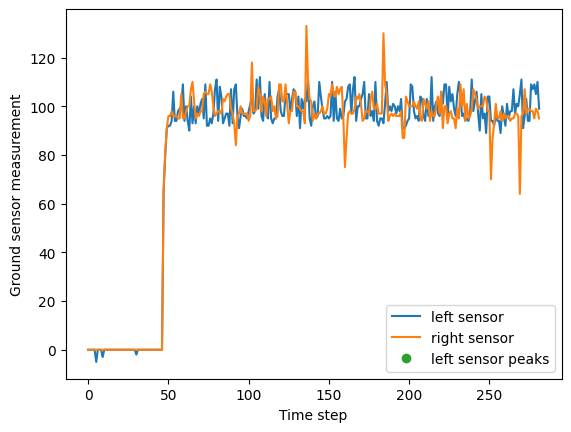

In [15]:
l_sensor = [x["left_speed"] for x in thymio_data]
r_sensor = [x["right_speed"] for x in thymio_data]
avg_ground = [(l+r)/2 for l, r in zip(l_sensor, r_sensor)]
l_peaks = find_peaks(l_sensor, 610, 10)[0]

plt.plot(l_sensor, label="left sensor")
plt.plot(r_sensor, label="right sensor")
plt.plot(l_peaks, [l_sensor[idx] for idx in l_peaks], "o", label = "left sensor peaks")
plt.xlabel("Time step")
plt.ylabel("Speed sensor measurement")
plt.legend()

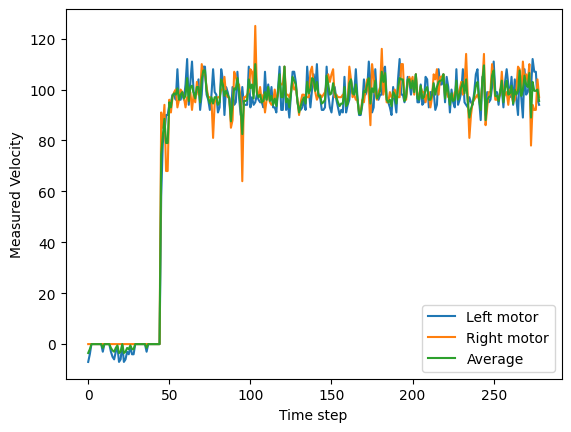

In [22]:
l_speed = [x["left_speed"] for x in thymio_data]
r_speed = [x["right_speed"] for x in thymio_data]
avg_speed = [(x["left_speed"]+x["right_speed"])/2 for x in thymio_data]
plt.plot(l_speed, label="Left motor")
plt.plot(r_speed, label="Right motor")
plt.plot(avg_speed, label="Average")
plt.xlabel("Time step")
plt.ylabel("Measured Velocity")
plt.legend()

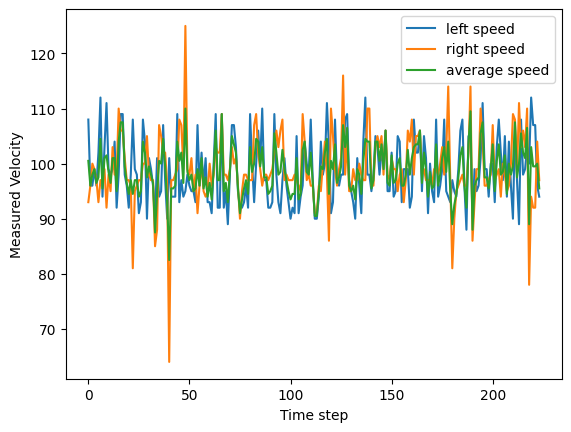

In [23]:
plt.plot(l_speed[55:], label="left speed")
plt.plot(r_speed[55:], label="right speed")
plt.plot(avg_speed[55:], label="average speed")
plt.xlabel("Time step")
plt.ylabel("Measured Velocity")
plt.legend()

<strong> Variance for speed :

In [322]:
thymio_mms_speed = 33.80
print("The Thymio's speed in mm/s is {}".format(thymio_mms_speed))

The Thymio's speed in mm/s is 33.8


In [323]:
thymio_speed_to_mms = thymio_mms_speed/100
#thymio_speed_to_mms = thm = [x/50 for x in thymio_mms_speed]

print(thymio_speed_to_mms)
print("To go from Thymio speed to mm/s, the conversion factor is {}".format(thymio_speed_to_mms))

0.33799999999999997
To go from Thymio speed to mm/s, the conversion factor is 0.33799999999999997


In [57]:
var_speed = np.var([x/thymio_speed_to_mms for x in avg_speed[55:]])
std_speed = np.std([x/thymio_speed_to_mms for x in avg_speed[55:]])
#var_speed = np.var(avg_speed[55:]/thymio_speed_to_mms)
#std_speed = np.std(avg_speed[55:]/thymio_speed_to_mms)

print("The speed variance in mm^2/s^2 is {}".format(std_speed))

The speed variance in mm^2/s^2 is 6.346328668700772


In [59]:
q_nu = std_speed/2 # variance on speed state
r_nu = std_speed/2 # variance on speed measurement 

print(q_nu,r_nu)

3.173164334350386 3.173164334350386


<strong> Turning : 

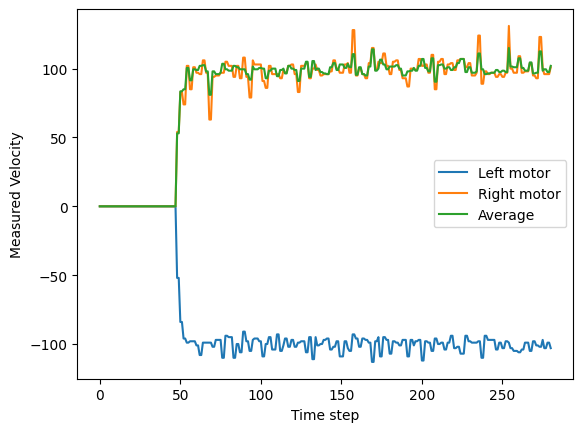

In [86]:
l_speed = [x["left_speed"] for x in thymio_data]
r_speed = [x["right_speed"] for x in thymio_data]
avg_speed = [abs(x["left_speed"]-x["right_speed"])/2 for x in thymio_data]
plt.plot(l_speed, label="Left motor")
plt.plot(r_speed, label="Right motor")
plt.plot(avg_speed, label="Average")
plt.xlabel("Time step")
plt.ylabel("Measured Velocity")
plt.legend()

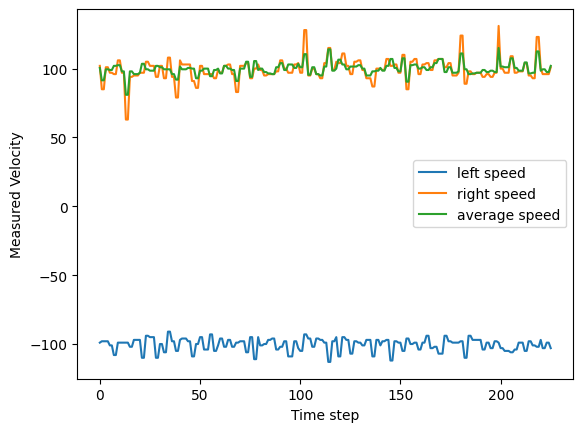

In [87]:
plt.plot(l_speed[55:], label="left speed")
plt.plot(r_speed[55:], label="right speed")
plt.plot(avg_speed[55:], label="average speed")
plt.xlabel("Time step")
plt.ylabel("Measured Velocity")
plt.legend()

In [74]:
thymio_theta_speed_left = 40.27
thymio_theta_speed_right = 42.50

print("The Thymio's rotation speed to the left in degre/s is {}".format(thymio_theta_speed_left))
print("The Thymio's rotation speed to the right in degre/s is {}".format(thymio_theta_speed_right))

The Thymio's rotation speed to the left in degre/s is 40.27
The Thymio's rotation speed to the right in degre/s is 42.5


In [75]:
thymio_speed_to_theta_left = thymio_theta_speed_left/100
thymio_speed_to_theta_right = thymio_theta_speed_right/100

print("To go from Thymio speed to degree/s, the conversion factor is {}".format(thymio_speed_to_theta_left))
print("To go from Thymio speed to degree/s, the conversion factor is {}".format(thymio_speed_to_theta_right))

To go from Thymio speed to degree/s, the conversion factor is 0.40270000000000006
To go from Thymio speed to degree/s, the conversion factor is 0.425


In [88]:
var_speed = np.var([x/thymio_speed_to_theta_left for x in avg_speed[55:]])
std_speed = np.std([x/thymio_speed_to_theta_left for x in avg_speed[55:]])
#var_speed = np.var(avg_speed[55:]/thymio_speed_to_mms)
#std_speed = np.std(avg_speed[55:]/thymio_speed_to_mms)

print("The speed variance to the left in degree^2/s^2 is {}".format(std_speed))

The speed variance to the left in degree^2/s^2 is 11.217441147758747


In [84]:
var_speed = np.var([x/thymio_speed_to_theta_left for x in avg_speed[55:]])
std_speed = np.std([x/thymio_speed_to_theta_left for x in avg_speed[55:]])
#var_speed = np.var(avg_speed[55:]/thymio_speed_to_mms)
#std_speed = np.std(avg_speed[55:]/thymio_speed_to_mms)

print("The speed variance to the right in degree^2/s^2 is {}".format(std_speed))

The speed variance to the right in degree^2/s^2 is 11.771602996004624


<strong> Variance for position :

In [13]:
qpx = 0.04 # variance on position state
qpy = 0.04
rpx = 0.25 # variance on position measurement 
rpy = 0.25

qpx = 0.04 # variance on position state
qpy = 0.04 
rpx = 0.25 # variance on position measurement 
rpy = 0.25


<strong>Variance for angle : 

In [14]:
std_speed = 11.77
q_theta_nu = std_speed/2 # variance on speed state
r_theta_nu = std_speed/2 # variance on speed measurement 

print(q_theta_nu,r_theta_nu)

5.885 5.885


In [264]:
# Initialising the remaining constants
# units: length [mm], time [s]
A = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
Q = np.array([[qpx, 0, 0], [0, qpy, 0],[0, 0, q_theta_nu]]); #w matrix
rotation_conv_factor = 0.41; #0.8 for 50 speed, 0.41 for 100 speed
speed_conv_factor = 0.338;

speed_conv_factor = 0.374 #mean of the two
transition_thresh = 500
l = 100 #mm, distance between the two wheels

def kalman_filter( x_est_prev, P_est_prev, Vr, Vl, Ts, camera_x=0, camera_y=0, camera_angle=0,):

    ## Prediciton through the a priori estimate
    # estimated mean of the state
    orientation = np.double(x_est_prev[2][0]%360)*2*np.pi/360
    #x_est_prev[2][0] = orientation
    B = np.array([[Ts*np.cos(orientation)/2,Ts*np.cos(orientation)/2],
         [Ts*np.sin(orientation)/2,Ts*np.sin(orientation)/2],
         [-Ts*360/(l*2*np.pi), Ts*360/(l*2*np.pi)]])
    U = np.array([[Vr*speed_conv_factor],[Vl*speed_conv_factor]])
    x_est_a_priori = np.dot(A, x_est_prev) + np.dot(B, U);
    
    # Estimated covariance of the state
    P_est_a_priori = np.dot(A, np.dot(P_est_prev, A.T));
    P_est_a_priori = P_est_a_priori + Q if type(Q) != type(None) else P_est_a_priori
    
    ## Update         
    # y, C, and R for a posteriori estimate, depending on transition
    if (camera_x != 0) : #XOR (one or the other but not both)
        # transition detected aka camera provides the position
        y = np.array([[camera_x],[camera_y],[camera_angle]])
        H = np.array([[1, 0, 0],[0, 1, 0],[0, 0, 1]])
        R = np.array([[rpx, 0, 0],[0, rpy,0],[0, 0, r_theta_nu]]) #not the value of the variance of the position measurments
        
        # innovation / measurement residual
        i = y - np.dot(H, x_est_a_priori); #measured-mean aka difference between the two states
        # measurement prediction covariance
        S = np.dot(H, np.dot(P_est_a_priori, H.T)) + R;
                 
        # Kalman gain (tells how much the predictions should be corrected based on the measurements)
        K = np.dot(P_est_a_priori, np.dot(H.T, np.linalg.inv(S)));
            
        # a posteriori estimate
        x_est = x_est_a_priori + np.dot(K,i);
        P_est = P_est_a_priori - np.dot(K,np.dot(H, P_est_a_priori));

    else:
        x_est = x_est_a_priori
        P_est = P_est_a_priori
     
    return x_est, P_est

In [155]:
x_est = np.array([[0], [0], [0]]) # in mm !!!
#P_est = [1000 * np.ones(2)]

P_est = 0
Vr = 100;
Vl = 100;

Ts = 0.1

#for i in range(0,20):
new_x_est, new_P_est = kalman_filter(x_est, P_est, Vr, Vl, Ts, camera_x=0, camera_y=0, camera_angle=0);
x_est = new_x_est;
P_est = new_P_est;

print(x_est[2][0])
print("new_x_est\n",new_x_est,"\n new_P_est\n", new_P_est)

8.69733149685918e-17
new_x_est
 [[3.7400000e+00]
 [0.0000000e+00]
 [8.6973315e-17]] 
 new_P_est
 [[0.04  0.    0.   ]
 [0.    0.04  0.   ]
 [0.    0.    5.885]]


In [17]:
acquire_data = True
Ts = 0.1
thymio_data = []

def motors(left, right):
    return {
        "motor.left.target": [left],
        "motor.right.target": [right],
    }

def get_data():
    thymio_data.append({"left_speed":node["motor.left.speed"],
                        "right_speed":node["motor.right.speed"]})
#if acquire_data:
#    await node.wait_for_variables() # wait for Thymio variables values
#    rt = RepeatedTimer(Ts, get_data) # it auto-starts, no need of rt.start()


In [183]:
import time

In [ ]:
thymio_data = []
initial_orientation = 0 #degree
positions = np.array([[0,0],[200,150]])#[0,0],[30,45],[50,50],[17,15],[50,10]
angle_threshold = 5 #degrees
x_est = np.array([[positions[0][0]], [positions[0][1]], [initial_orientation]])
P_est = 0
Ts = 0.1
count = 0


async def main():    

    global x_est, P_est, Ts
    await node.wait_for_variables() # wait for Thymio variables values
    rt = RepeatedTimer(Ts, filter)#, x_est, P_est, Ts)
    
    try:
        for i in range(0,50):
            #start = time.time()
            #turn to allign with the goal
            angle = angle_to_rotate([x_est[0][0],x_est[1][0]],positions[1],x_est[2][0]);
            #print([x_est[0][0],x_est[1][0]])
            #print(x_est[2][0])
            #print(angle)
            #await drive_turn(angle,x_est[2][0])
            print(angle)
            #print(x_est[2][0])
            
            if abs(angle)<angle_threshold:
                await asyncio.sleep(0.5)
                #straight for Ts=0.1 seconds
                print("straight")
                drive_task = asyncio.create_task(drive_for_seconds(client, Ts))
                await drive_task
    
                #print(Vl,Vr)
                #print(x_est)
                #Vr = np.mean(thymio_data[-10:-1]["right_speed"])
                #Vl = np.mean(thymio_data[-10:-1]["left_speed"])
                #Vr = 100
                #Vl = 100
                #end = time.time()
                #print("Straight")
                #print(x_est)
    
            else:
                await asyncio.sleep(0.5)
                #print("abs(angle) = ", abs(angle))
                if angle>0:
                    right = 1
                    #Vr = -100
                    #Vl = 100
                else:
                    right = 0
                    #Vr = 100
                    #Vl = -100
                turn_task = asyncio.create_task(turn_for_seconds(client, Ts, right))
                await turn_task
    finally:
        rt.stop()
        node.send_set_variables(motors(0, 0))
                #print("Vr = ", Vr, "Vl = ", Vl)
                #end = time.time()
                    
            #print("x_est = ", x_est)
            #end = time.time()
            #print("Time = ", end - start)

    #print("x_est = ", x_est)
        
    #print("distances =", distances,"rotation =", rotations, "orientation =",orientation)
    #await drive(distances, rotations, orientation)
    

await main()

36.86989764584402
-102 96
[[-0.1122    ]
 [ 0.        ]
 [ 4.24286706]]
-102 96
[[-2.24092505e-01]
 [-8.30104281e-03]
 [ 8.48573413e+00]]
-102 96
[[-0.33506421]
 [-0.02485763]
 [12.72860119]]
-102 96
[[-0.44450686]
 [-0.04957901]
 [16.97146826]]
-102 96
[[-0.55182058]
 [-0.08232968]
 [21.21433532]]
-53 44
[[-0.70871544]
 [-0.14323035]
 [23.29291161]]
13.50597693509025
-53 44
[[-0.8632982 ]
 [-0.20978153]
 [25.3714879 ]]
-53 44
[[-1.01536543]
 [-0.28189565]
 [27.45006419]]
-53 44
[[-1.16471703]
 [-0.35947781]
 [29.52864048]]
-53 44
[[-1.31115645]
 [-0.4424259 ]
 [31.60721677]]
-53 44
[[-1.45449098]
 [-0.53063079]
 [33.68579306]]
-53 44
[[-1.59453201]
 [-0.62397638]
 [35.76436935]]
-93 110
[[-1.33657923]
 [-0.43817872]
 [40.11437952]]
-3.3473877154764935
-93 110
[[-1.09346212]
 [-0.23335079]
 [44.46438969]]
-93 110
[[-8.66581357e-01]
 [-1.06727037e-02]
 [ 4.88143999e+01]]
-93 110
[[-0.6572441 ]
 [ 0.22857262]
 [53.16441004]]
-93 110
[[-0.46665642]
 [ 0.48300678]
 [57.51442021]]
-93 110
[

In [19]:

thymio_data = []
await node.wait_for_variables() # wait for Thymio variables values
#node.var
#rt = RepeatedTimer(Ts, get_data) # it auto-starts, no need of rt.start()
thymio_data.append({"left_speed":node["motor.left.speed"],
                    "right_speed":node["motor.right.speed"]})
print(thymio_data)

[{'left_speed': 0, 'right_speed': 0}]


In [20]:
async def drive_turn(rotations,orientation):

    ONETURN_RIGHT = 8.47 #s/turn #8.599
    ONETURN_LEFT = 8.94 #s/turn 
    if rotations >= 0:
        rotation_time = rotations*ONETURN_RIGHT/360
        print("I turn right for :", rotation_time)
    else:
        rotation_time = rotations*ONETURN_LEFT/360

    turn_task = asyncio.create_task(turn_for_seconds(client, rotation_time))
    await turn_task
    

In [21]:
def motors(left, right):
    return {
        "motor.left.target": [left],
        "motor.right.target": [right],
    }

In [263]:
async def turn_for_seconds(client, seconds,right):
    # Set the motor speeds
    if seconds != 0:
        if right==1:
            v = {
                "motor.left.target": [int(100)],
                "motor.right.target": [int(-100)],
            }
        else:
            v = {
                "motor.left.target": [int(-100)],
                "motor.right.target": [int(100)],
            }
        await node.set_variables(v)
        await asyncio.sleep(abs(seconds))

In [178]:
a= np.array([50,50])
b = np.array([50,50])
print(angle_to_rotate(a,b,90))
s = np.array([1,2,3,4,5,6,7,8,9])
print(s[-3:-1])

Vr = thymio_data[-10:-1]
print(Vr)

-90.0
[7 8]
[]


In [203]:
node.send_set_variables(motors(0, 0))


In [234]:
def filter():#x_est, P_est, Ts):
    global x_est, P_est, Ts
    #thymio_data = []
    #print(x_est)
    thymio_data.append({"left_speed":node["motor.left.speed"],
                        "right_speed":node["motor.right.speed"]})
    Vl = thymio_data[-1]["left_speed"]
    Vr = thymio_data[-1]["right_speed"]

    print(Vr, Vl)
    
    x_est, P_est = kalman_filter(x_est, P_est, Vr, Vl, Ts, camera_x=0, camera_y=0, camera_angle=0);
    print(x_est)
    